# <center> Поиск аномалий в данных </center>

Домашнее задание.

Как найти стог сена в иголке? Практический проект по построению системы поиска аномалий. 

Цель:
В этом домашнем задании вам предстоит настроить систему по поиску аномалий в банковских транзакциях. Мало того, что аномальных значений в данных меньше одного процента, так еще и переменные анонимизированные и представляют собой первые 28 главных компонент, полученных после PCA преобразования оригинальных данных (о которых мы ничего не знаем). 

Смогут ли бравые unsupervised методы справится с такой задачей? Можно ли работать в таких условиях? Кто подставил кролика Роджера? Ответы на некоторые их этих вопросов вы узнаете после выполнения задания :) 

Описание/Пошаговая инструкция выполнения домашнего задания:
Скачайте датасет с https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv и
Проведите небольшой EDA (гистограммы и описательные статистики - обязательно).

Воспользуйтесь процентом аномалий, подсчитанным по переменной Class, как "экспертной оценкой" загрязненности нашего датасета.

Попробуйте построить различные модели и алгоритмы, разобранные на занятии, используя полученную экспертную оценку для настройки параметров.

Воспользуйтесь стандартными методами оценки качества бинарной классификации (особенно хорошо подойдёт classification report и confusion matrix), и, используя предсказания моделей и переменную Class, проверьте, действительно ли модели справляются со своей задачей и на сколько хорошо они это делают.

При помощи tSNE и/или UMAP, постройте сжатое представление исходных данных и проверьте, действительно ли аномалии лежат достаточно далеко от основной массы точек

#1 EDA of this massive data set

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install MulticoreTSNE

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Data was prepared, the means are all equal to 0. Std values, min and max(es) are similar  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

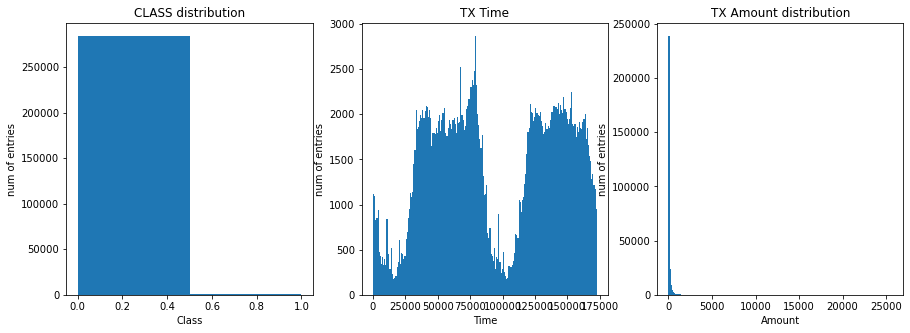

CLASS: 1 for fraudulent transactions, 0 otherwise distribution
 Almost no frauds in data, banking must be profitable hot da-a-amn


In [ ]:
plt.figure(figsize=(15,5))

#plot 1:
plt.subplot(1, 3, 1)
plt.hist(df['Class'], bins=2)
plt.xlabel('Class')
plt.ylabel('num of entries')
plt.title('CLASS distribution')

#plot 2:
plt.subplot(1, 3, 2)
plt.hist(df['Time'], bins=200)
plt.xlabel('Time')
plt.ylabel('num of entries')
plt.title('TX Time')

#plot 3:
plt.subplot(1, 3, 3)
plt.hist(df['Amount'], bins=200)
plt.xlabel('Amount')
plt.ylabel('num of entries')
plt.title('TX Amount distribution')

plt.show()
print('CLASS: 1 for fraudulent transactions, 0 otherwise distribution\n Almost no frauds in data, banking must be profitable hot da-a-amn')

There are two periods that are busy in txses. The mean amount is 88 and is barely visible here

In [ ]:
print("The number of fraudulant TX corresponds to class == 1")
print(class_only.value_counts(0))
print("\nAnd in relative termas it looks like this")
print(class_only.value_counts(1))

The number of fraudulant TX corresponds to class == 1
0    284315
1       492
Name: Class, dtype: int64

And in relative termas it looks like this
0    0.998273
1    0.001727
Name: Class, dtype: float64


In [ ]:
data_raw=df[df.columns[1:-1]]
class_only=df["Class"]

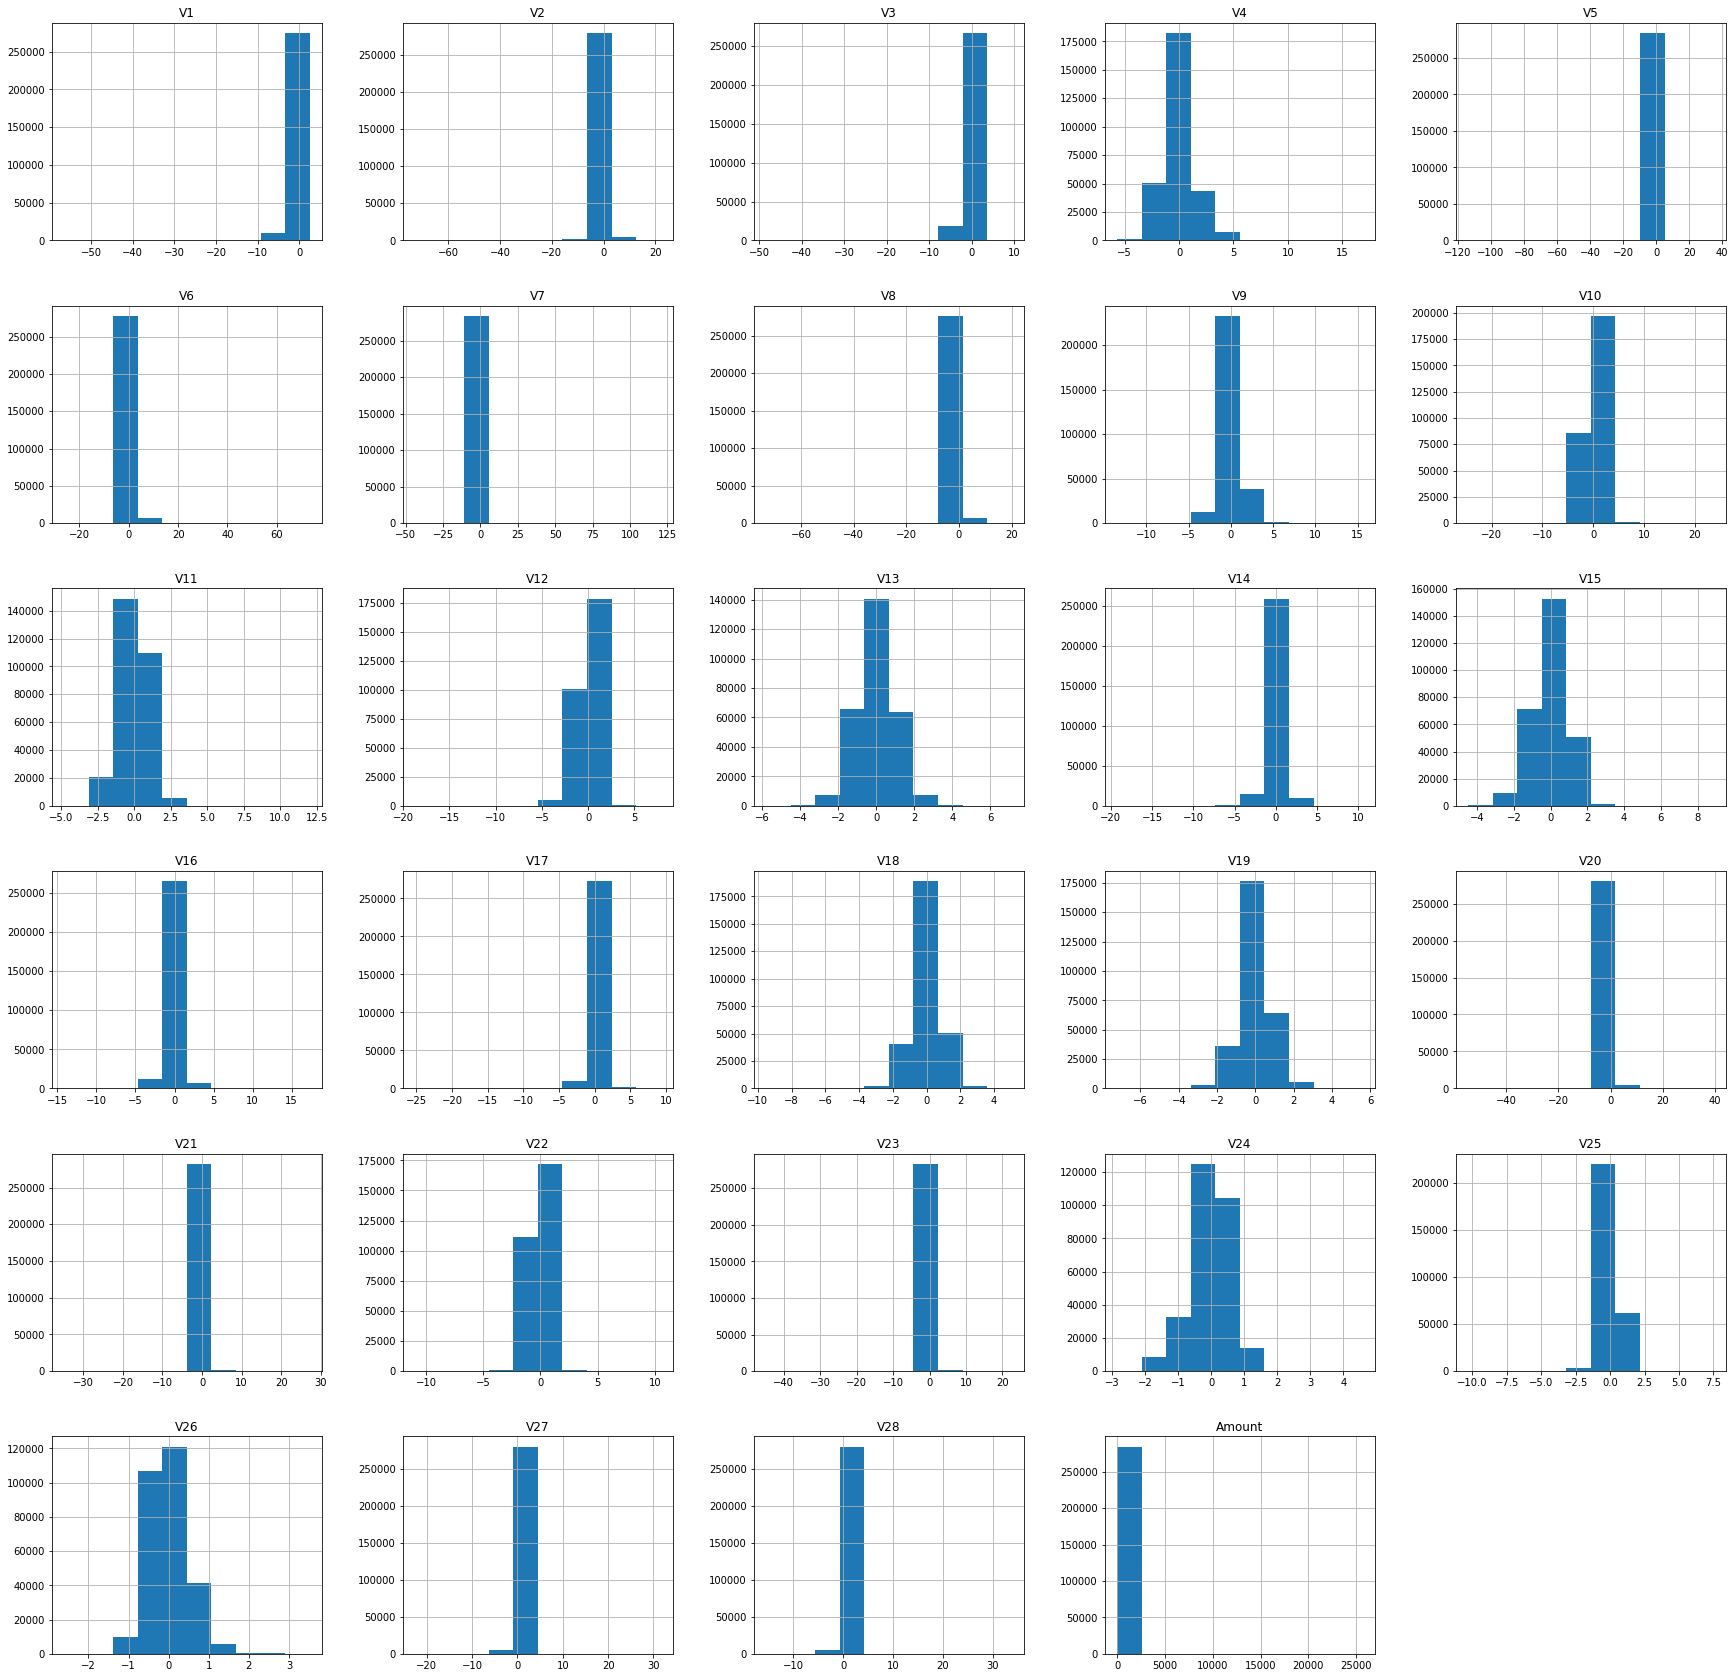

In [ ]:
data_raw.hist(figsize=(30, 30));

Data set is massive thats for certain. 

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
data_sample, data_bulk, class_sample, class_bulk = train_test_split(data_raw, class_only, test_size=0.99, random_state=5)

#small sample is taken here to plot some scatterplots 


In [ ]:
print(class_sample.value_counts())
print(class_sample.value_counts(1))

0    2840
1       8
Name: Class, dtype: int64
0    0.997191
1    0.002809
Name: Class, dtype: float64


Let's see scatterplots for a small sample of the data (2840 entries) with even smaller frauds = **8**!

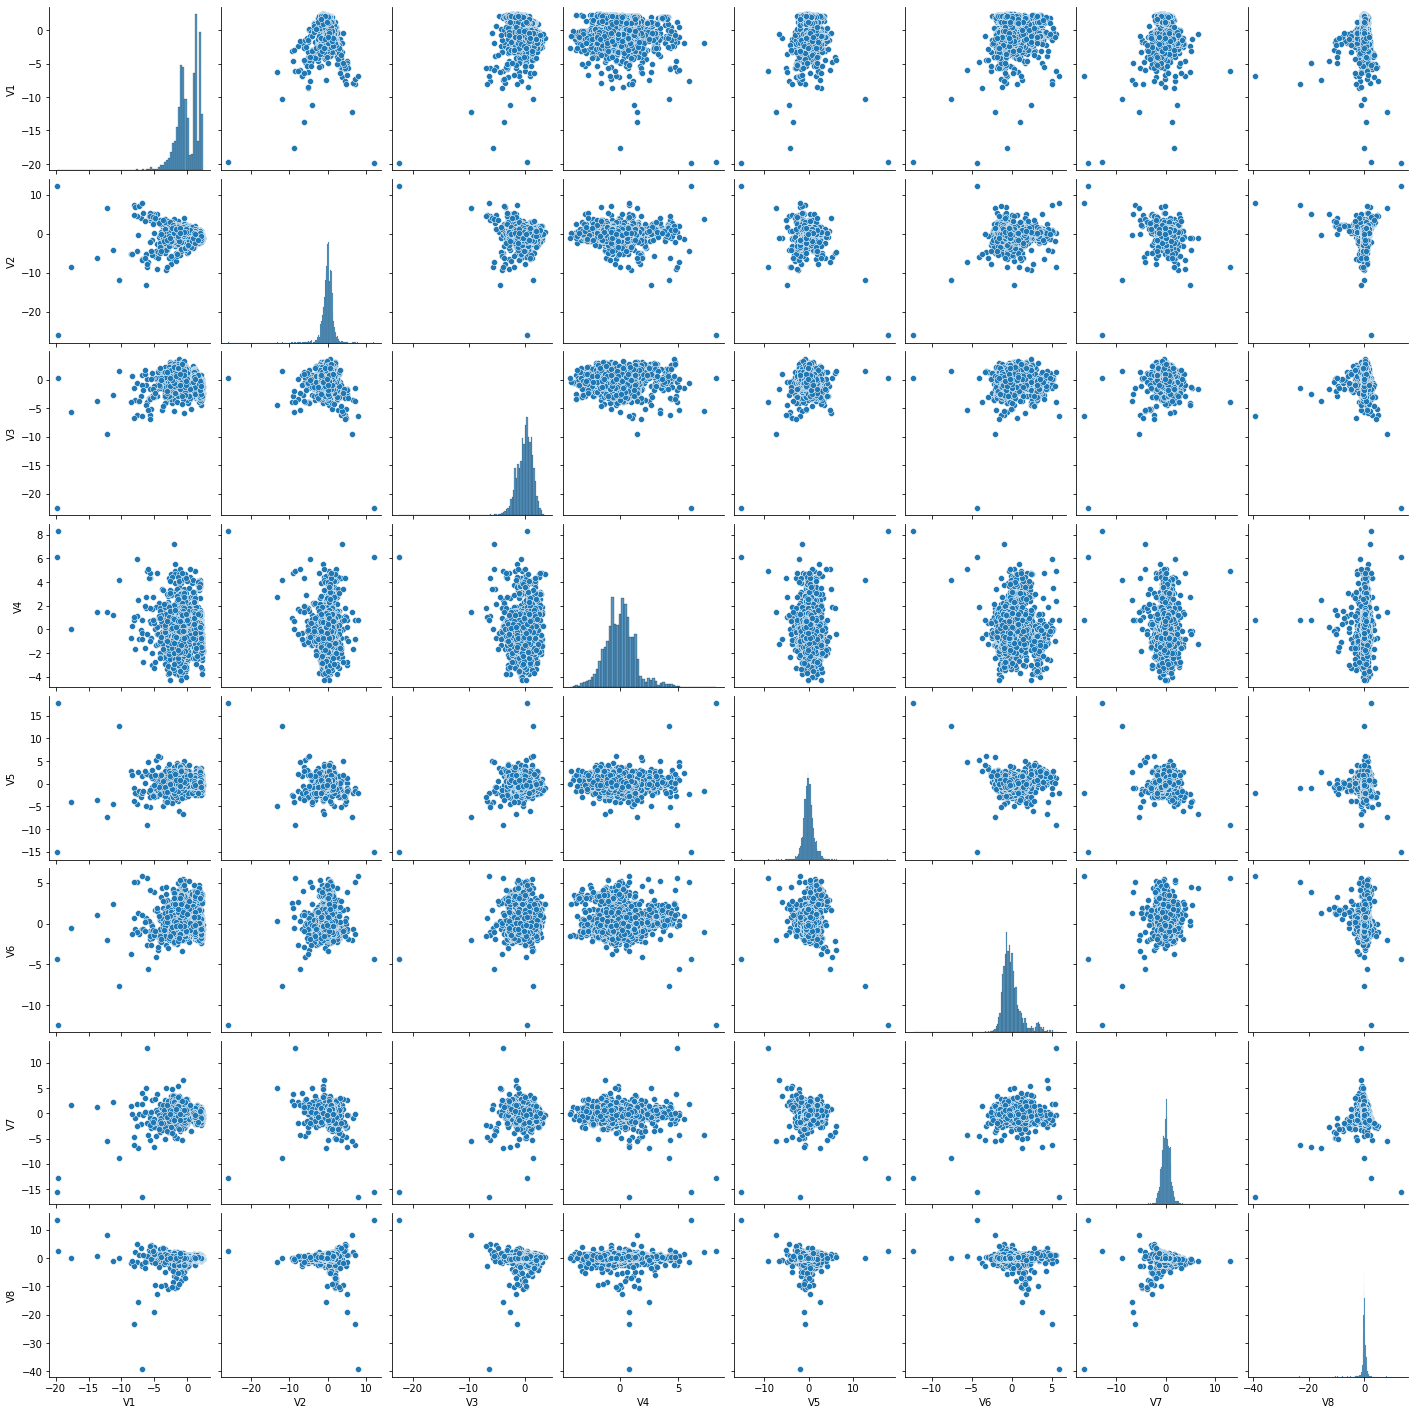

In [ ]:
sns.pairplot(data_sample[data_sample.columns[0:8]]);
#.... too heavy function

The components in first principal vectors already show that there are some irregularities in the data. It seems that there are much more of them than just simply 0.1727% (more than 8)

#2 ..can we use tSNE and UMAP to see something?

In [ ]:
!pip install umap-learn

In [ ]:
import umap
from sklearn.preprocessing import RobustScaler

In [ ]:
data_sample, data_bulk, class_sample, class_bulk = train_test_split(data_raw, class_only, test_size=0.90, random_state=5)

# taking sample of 1/10 th to make the data workable

In [ ]:
scaler = RobustScaler()
scaled_data_sample = pd.DataFrame(
    data=scaler.fit_transform(data_sample), 
    columns=data_sample.columns
)

In [ ]:
reducer = umap.UMAP(n_components=2,random_state=42)
umap_data_transformed = reducer.fit_transform(scaled_data_sample)

In [ ]:
class_sample.value_counts()
# Making sure the percentage is consistent with the data... 
# Althou with such a small number i can't say that this is statistically correct analysis

0    28430
1       50
Name: Class, dtype: int64

In [ ]:
!pip install MulticoreTSNE

  Created wheel for MulticoreTSNE: filename=MulticoreTSNE-0.1-cp37-cp37m-linux_x86_64.whl size=68517 sha256=1a6148ec0711fc5044d580097ce63f5d5eefba709357e9df7e35412577578ba1
  Stored in directory: /root/.cache/pip/wheels/80/47/df/c0d66e9f775f33281c422a1964de86a59c47f93bb8c37643e3
Successfully built MulticoreTSNE


In [ ]:
from MulticoreTSNE import MulticoreTSNE as TSNE

In [ ]:
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
tsne_data_transformed = tsne.fit_transform(scaled_data_sample)

In [ ]:
tsnedf = pd.DataFrame(tsne_data_transformed, columns = ['x', 'y'])
tsnedf['class']=class_sample.values
umapdf = pd.DataFrame(umap_data_transformed, columns = ['x', 'y'])
umapdf['class']=class_sample.values

		Data embedded into 2 dimensions by UMAP 				 Data embedded into 2 dimensions by tSNE


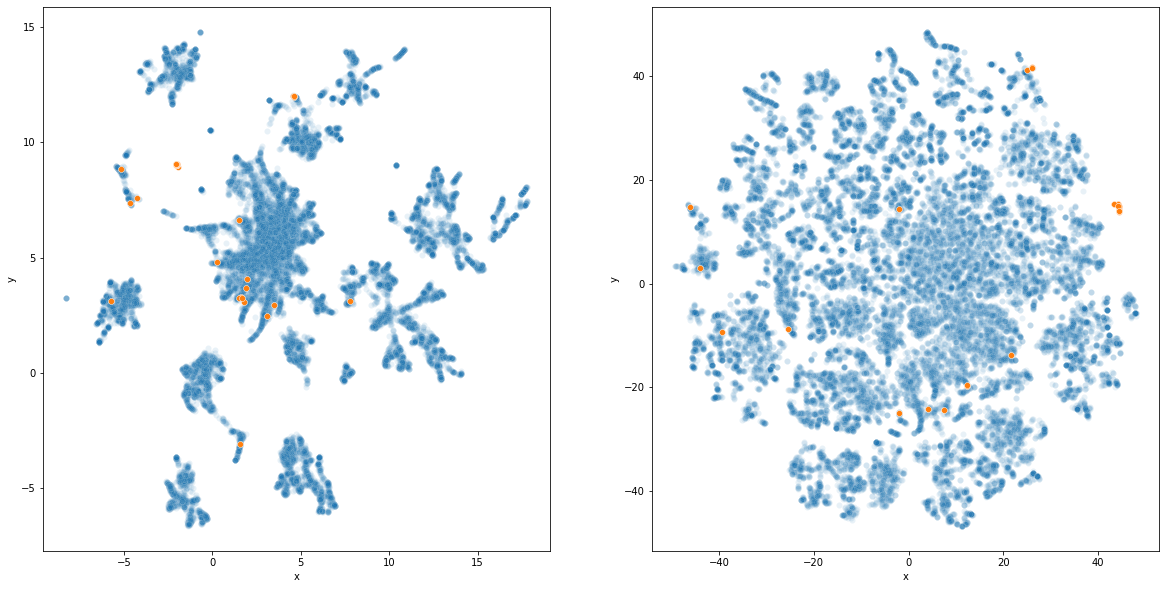

In [ ]:
print('\t\tData embedded into 2 dimensions by UMAP','\t\t\t\t','Data embedded into 2 dimensions by tSNE')

fig, axs = plt.subplots(ncols=2,figsize=(20,10))

sns.scatterplot(x="x", y="y", data=umapdf[umapdf['class']== 0 ], alpha=0.1, ax=axs[0])
sns.scatterplot(x="x", y="y", data=umapdf[umapdf['class'] == 1], alpha=1.0, ax=axs[0])

sns.scatterplot(x="x", y="y", data=tsnedf[tsnedf['class']== 0 ], alpha=0.1, ax=axs[1])
sns.scatterplot(x="x", y="y", data=tsnedf[tsnedf['class'] == 1], alpha=1.0, ax=axs[1])
plt.show()

With sample of 10% of data UMAP localizes some portion of 50 fraudulent points so that they are visually distinguishable. The rest are lost in massive data distribution.

tSNE alg. is MUCH slower even with n_components=2. 

##...if i'm not careful with plotting the data, than portion of it gets lost from sight ...

		Data embedded into 2 dimensions by UMAP 				 Data embedded into 2 dimensions by tSNE


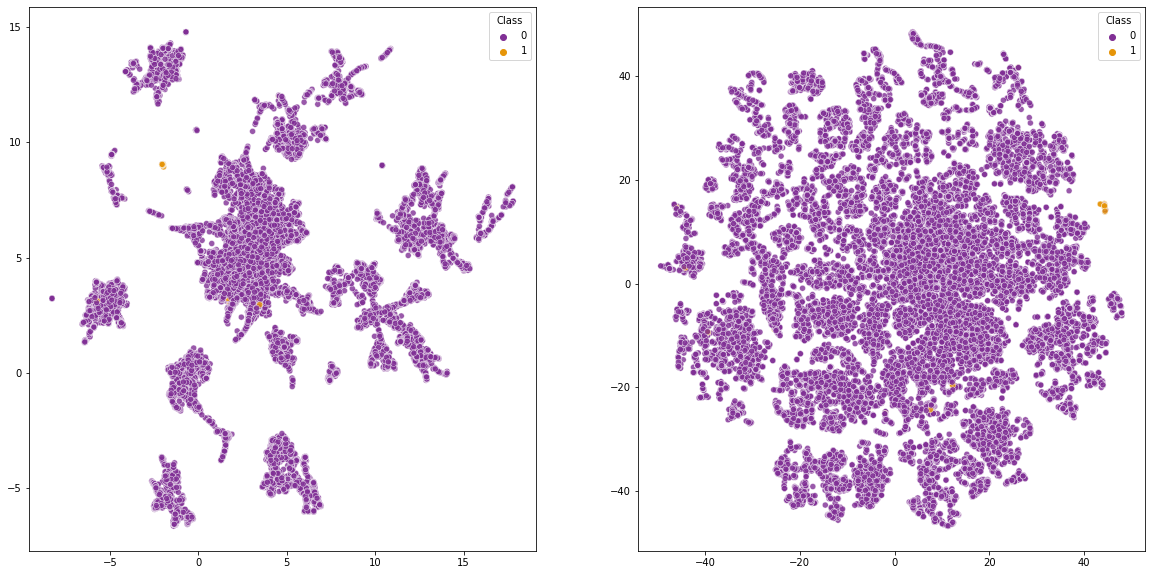

In [ ]:
print('\t\tData embedded into 2 dimensions by UMAP','\t\t\t\t','Data embedded into 2 dimensions by tSNE')

plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
sns.scatterplot(
    x=umap_data_transformed[:, 0], 
    y=umap_data_transformed[:, 1], 
    hue=class_sample, 
    alpha=0.8,
    palette="CMRmap",
    legend='full'
)

plt.subplot(1, 2, 2)
sns.scatterplot(
    x=tsne_data_transformed[:, 0], 
    y=tsne_data_transformed[:, 1], 
    hue=class_sample, 
    alpha=0.8,
    palette="CMRmap",
    legend='full'
)

Here data is lost in plotting class 1 "behind" class 0.
Going forwards i do repeat this mistake a lot and plot correct views only for the combined final model

In [ ]:
#3.0 What are my solving capabilities..?

In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
import umap
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler

std_times = list()
distance_based_times = list()
dbscan_times = list()
umap_times = list()
tSNE_times = list()
dbscan_2_dims = list()
OC_SVM_times = list()
forest_times = list()
num_of_frauds = list()
num_of_samples = list()

n_runs = 8
expert_pc=100.0 - 0.001727*100


scaler = RobustScaler()
scaled_data = pd.DataFrame(
    data=scaler.fit_transform(data_raw), 
    columns=data_raw.columns
)

for i in range(1,n_runs):
    portion_of_data = 1 - i /100.0 
    data_sample, rest_of_data, class_sample, rest_of_class = train_test_split(scaled_data, class_only, test_size=portion_of_data, random_state=2)
    num_of_frauds.append(class_sample.value_counts().to_dict()[1])
    num_of_samples.append(class_sample.value_counts().to_dict()[0])
    
    t = time.time()
    comparison_table, std_outliers = get_column_outliers(data_sample)
    std_times.append(time.time() - t)
    
    t = time.time()
    euclidian_model = DistanceOutliers(metric='euclidean', percentile=expert_pc)
    euclidian_model.fit(data_sample)
    distance_based_times.append(time.time() - t)
    
    t = time.time()
    model = DBSCAN(eps=22).fit(data_sample)
    dbscan_times.append(time.time() - t)
    
    t = time.time()
    reducer = umap.UMAP(n_components=2,random_state=42)
    umap_data_sample = reducer.fit_transform(data_sample)
    umap_times.append(time.time() - t)
    
    t = time.time()
    tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
    tsne_data_transformed = tsne.fit_transform(data_sample)
    tSNE_times.append(time.time() - t)

    t = time.time()
    model = DBSCAN(eps=22).fit(umap_data_sample)
    dbscan_2_dims.append(time.time() - t)

    t = time.time()
    one_class_svm = OneClassSVM(nu=0.10, gamma='auto')
    one_class_svm.fit(data_sample)
    OC_SVM_times.append(time.time() - t)

    t = time.time()
    isolation_forest = IsolationForest(n_estimators=100, contamination=0.002,max_features=1.0, bootstrap=True)
    isolation_forest.fit(data_sample)
    forest_times.append(time.time() - t)
    
    

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have v

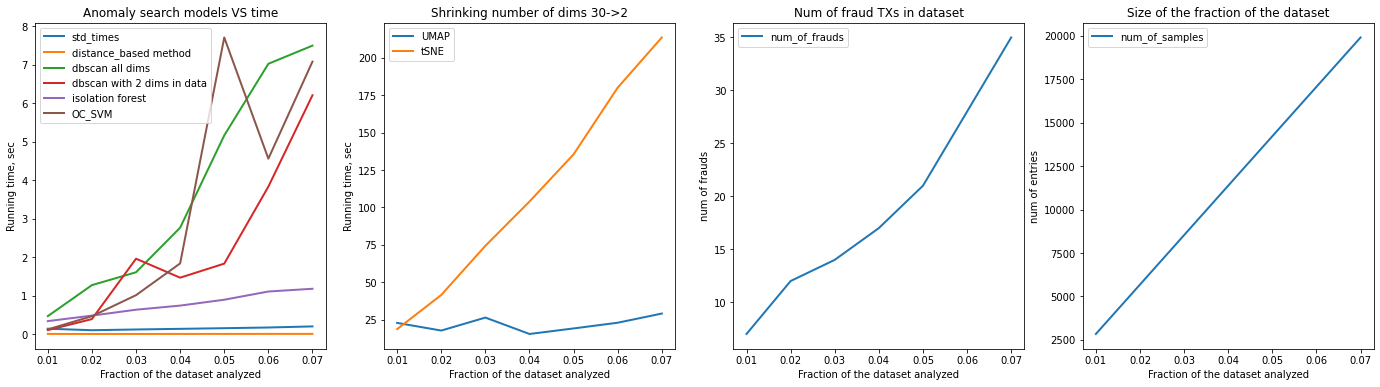

In [ ]:
allX=[]
for i in range(1,n_runs):
    allX.append(i/100.0)
    
plt.figure(figsize=(24, 6))

plt.subplot(1, 4, 1)

plt.plot(allX,std_times, label='std_times', lw=2)
plt.plot(allX,distance_based_times, label='distance_based method', lw=2)
plt.plot(allX,dbscan_times, label='dbscan all dims', lw=2)
plt.plot(allX,dbscan_2_dims, label='dbscan with 2 dims in data', lw=2)
plt.plot(allX,forest_times, label='isolation forest', lw=2)
plt.plot(allX,OC_SVM_times, label='OC_SVM', lw=2)

plt.legend(loc='best')
plt.xlabel('Fraction of the dataset analyzed')
plt.ylabel('Running time, sec')
plt.title('Anomaly search models VS time')

plt.subplot(1, 4, 2)
plt.plot(allX,umap_times, label='UMAP', lw=2)
plt.plot(allX,tSNE_times, label='tSNE', lw=2)
plt.xlabel('Fraction of the dataset analyzed')
plt.ylabel('Running time, sec')
plt.legend(loc='best')
plt.title('Shrinking number of dims 30->2')

plt.subplot(1, 4, 3)
plt.plot(allX,num_of_frauds, label='num_of_frauds', lw=2)
plt.xlabel('Fraction of the dataset analyzed')
plt.ylabel('num of frauds')
plt.legend(loc='best')
plt.title('Num of fraud TXs in dataset')

plt.subplot(1, 4, 4)
plt.plot(allX,num_of_samples, label='num_of_samples', lw=2)
plt.xlabel('Fraction of the dataset analyzed')
plt.ylabel('num of entries')
plt.legend(loc='best')
plt.title('Size of the fraction of the dataset')

plt.show()



tSNE algorithms is an order of magnitude slower than UMAP. And UMAP takes much more time than the methods themselves.
In betbeen methods DBScan is the slowest one. ....And im not sure why the distance based one is the fastest, even faster than the "3 sigma" one.

#3 More detailed view on Methods 

##Creating 2d points representations

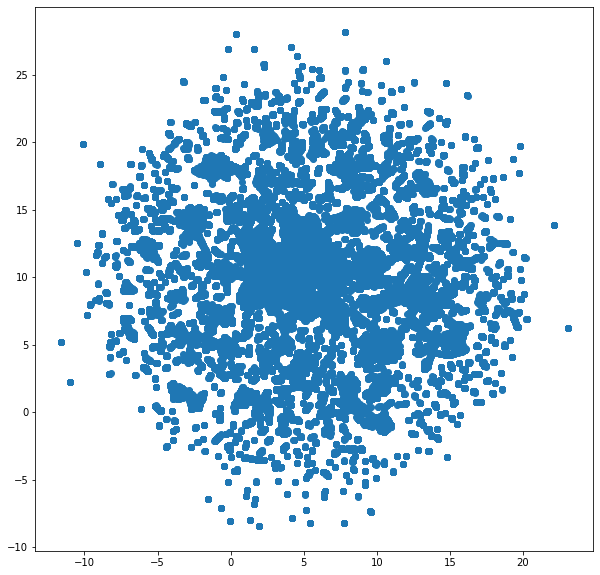

In [ ]:
reducer = umap.UMAP(n_components=2,random_state=42)
umap_data_transformed = reducer.fit_transform(scaled_data)

plt.figure(figsize=(10, 10))
plt.scatter(umap_data_transformed[:, 0], umap_data_transformed[:, 1]);

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

##Standart distribution - deviation 3 standart Sigmas  

In [ ]:
def outlier_std(data, col, threshold=3):
    mean = data[col].mean()
    std = data[col].std()
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [ ]:
def get_column_outliers(data, columns=None, function=outlier_std, threshold=3):
    if columns:
        columns_to_check = columns
    else:
        columns_to_check = data.columns
    
    data_features = data
    outliers = pd.Series(data=[False]*len(data), index=data_features.index, name='is_outlier')
    comparison_table = {}
    for column in columns_to_check:
        anomalies, upper_bound, lower_bound = function(data, column, threshold=threshold)
        comparison_table[column] = [upper_bound, lower_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]
        outliers[anomalies[anomalies].index] = True
    
    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    comparison_table = comparison_table.sort_values(by='anomalies_percentage', ascending=False)
    
    return comparison_table, outliers

def anomalies_report(outliers):
    print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}%".format(
            sum(outliers), 100*sum(outliers)/len(outliers)))    

In [ ]:
comparison_table, std_outliers = get_column_outliers(data_raw)
anomalies_report(std_outliers)

Total number of outliers: 37816
Percentage of outliers:   13.28%


In [ ]:
comparison_table

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
V27,1.210897,-1.210897,4771.0,1.675170
V6,3.996813,-3.996813,4652.0,1.633387
V20,2.312775,-2.312775,4645.0,1.630929
V2,4.953926,-4.953926,4318.0,1.516114
V8,3.583059,-3.583059,4221.0,1.482056
Amount,838.709947,-662.010708,4076.0,1.431145
V21,2.203572,-2.203572,4064.0,1.426931
V1,5.876087,-5.876087,3701.0,1.299476
V10,3.266549,-3.266549,3488.0,1.224689
V7,3.711281,-3.711281,3401.0,1.194142


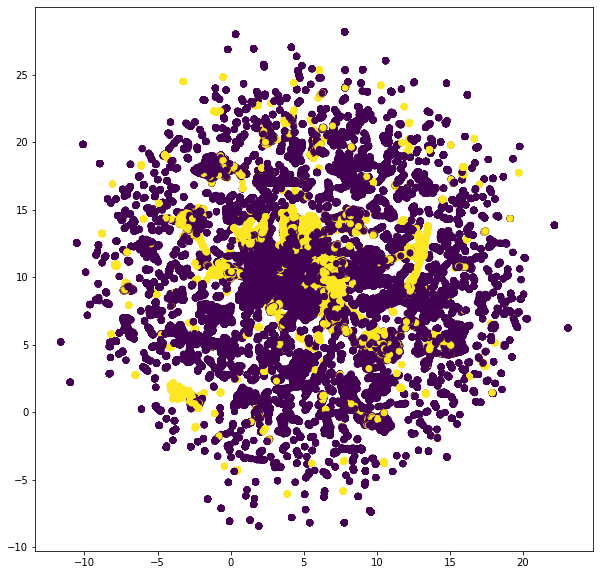

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(umap_data_transformed[:, 0], umap_data_transformed[:, 1], c=std_outliers);

TOO Many outliers found by this method.

              precision    recall  f1-score   support

           1       0.01      0.90      0.02       492

   micro avg       0.01      0.90      0.02       492
   macro avg       0.01      0.90      0.02       492
weighted avg       0.01      0.90      0.02       492

confusion_matrix
 [[246943  37372]
 [    48    444]]
3 sigma normal distribution has great recall, but 
bad at Precision


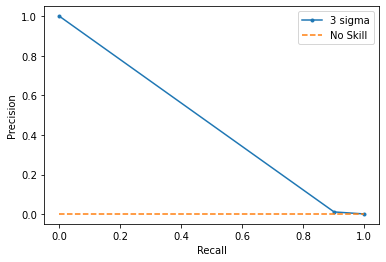

In [ ]:
print(classification_report(class_only, std_outliers, labels=[1]))
print("confusion_matrix\n",confusion_matrix(class_only, std_outliers))

lr_precision, lr_recall, _ = precision_recall_curve(class_only, std_outliers)

no_skill = len(class_only[class_only==1]) / len(class_only)

plt.plot(lr_recall, lr_precision, marker='.', label='3 sigma')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
print("3 sigma normal distribution has great recall, but ")
print("bad at Precision")

In [ ]:
F1 = 2 * (lr_precision[1] * lr_recall[1]) / (lr_precision[1] + lr_recall[1])
Addi2 = [[lr_precision[1]],[lr_recall[1]], [F1]]
summary_0prec_1rec_2f1 = pd.DataFrame(Addi2, columns = ['3 sigma'])

## Any distributions' 3 IQR (interquartile range)

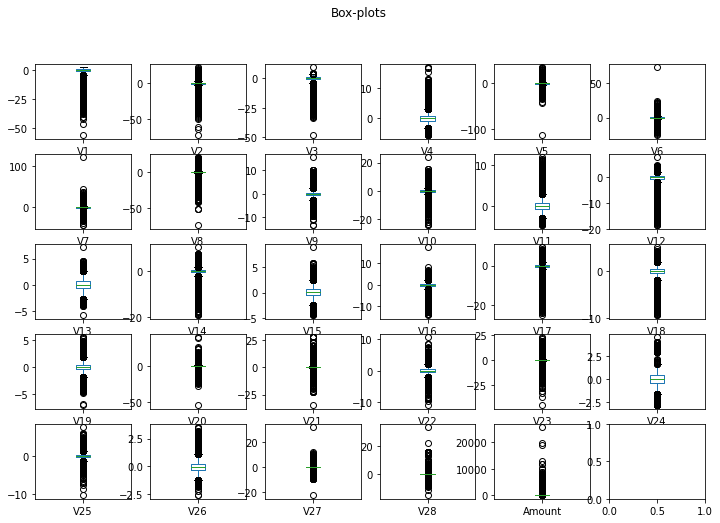

In [ ]:
fig, axes = plt.subplots(5, 6, figsize=(12, 8))
fig.suptitle('Box-plots')

row=0
col=0

for ax, feature in enumerate(data_raw):
    data_raw[feature].plot.box(ax=axes[row, col])
    col+=1
    if col > 5:
        row+=1
        col=0

On smaller data sample we might be able to see something, but here it looks unclear

In [ ]:
def outlier_iqr(data, col, threshold=3):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    up_bound = data[col].quantile(0.75) + (IQR * threshold)
    low_bound = data[col].quantile(0.25) - (IQR * threshold)
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [ ]:
comparison_table, iqr_outliers = get_column_outliers(data_raw, function=outlier_iqr)
anomalies_report(iqr_outliers)

Total number of outliers: 53336
Percentage of outliers:   18.73%


In [ ]:
comparison_table

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
Amount,291.860000,-209.095000,18941.0,6.650469
V27,0.576699,-0.556493,16524.0,5.801824
V20,1.167327,-1.246008,13385.0,4.699674
V28,0.471999,-0.446679,12573.0,4.414568
V8,1.935273,-1.816557,11285.0,3.962332
V23,1.076107,-1.090312,8135.0,2.856320
V21,1.430694,-1.472711,6934.0,2.434631
V6,3.899146,-4.268877,5389.0,1.892159
V2,5.010545,-4.805371,4453.0,1.563515
V10,3.421971,-3.503473,3208.0,1.126377


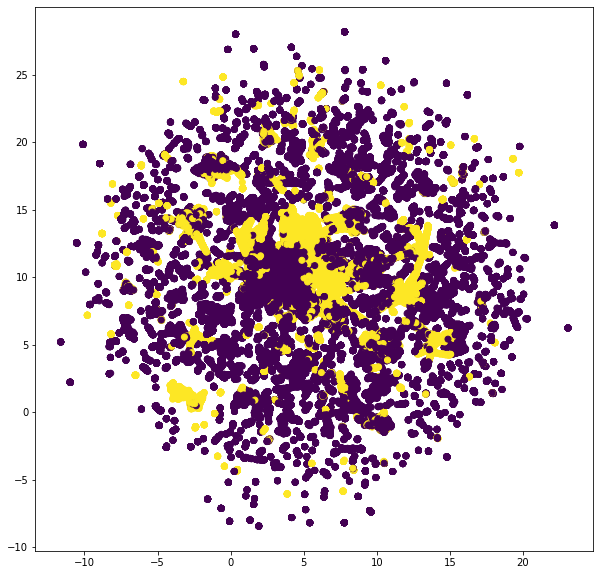

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(umap_data_transformed[:, 0], umap_data_transformed[:, 1], c=iqr_outliers);

Too many outliers found by this method. Even hard to analyze

              precision    recall  f1-score   support

           1       0.01      0.92      0.02       492

   micro avg       0.01      0.92      0.02       492
   macro avg       0.01      0.92      0.02       492
weighted avg       0.01      0.92      0.02       492

[[231431  52884]
 [    40    452]]
3 IQR model has good recall, bad precision
and overall medium AUC


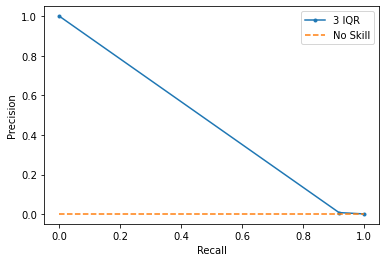

In [ ]:
print(classification_report(class_only, iqr_outliers, labels=[1]))
print(confusion_matrix(class_only, iqr_outliers))

lr_precision, lr_recall, _ = precision_recall_curve(class_only, iqr_outliers)

no_skill = len(class_only[class_only==1]) / len(class_only)

plt.plot(lr_recall, lr_precision, marker='.', label='3 IQR')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
print("3 IQR model has good recall, bad precision")
print("and overall medium AUC")

In [ ]:
F1 = 2 * (lr_precision[1] * lr_recall[1]) / (lr_precision[1] + lr_recall[1])
Addi2 = [lr_precision[1],lr_recall[1], F1]
summary_0prec_1rec_2f1['3 IQR']=Addi2

## Distance based model. 1. Euclidian

In [ ]:
from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist
from sklearn.preprocessing import RobustScaler

class DistanceOutliers(BaseEstimator):
    """
    -----------
    Parameters:
    
    - metric: string, default - euclidean
        metric to use for distance calculation (see scipy.spatial.distance.cdist)
        
    - percentile: float in range [0, 100]
        hyperparameter which sets the threshold for anomalies
    """
    def __init__(self, metric='euclidean', percentile=90):
        self.metric = metric
        self.percentile = percentile
        
    def fit(self, X):
        self.centroid = np.mean(X, axis=0).values.reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)
        
    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

Так как мы имеем дело с расстояниями - нужно убедиться, что все данные в одном масштабе

In [ ]:
scaler = RobustScaler()
scaled_data = pd.DataFrame(
    data=scaler.fit_transform(data_raw), 
    columns=data_raw.columns
)

Not much will change, since the original data was prepared

In [ ]:
scaled_data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,-0.008099,-0.046700,-0.093789,0.012467,0.041684,0.234978,-0.035663,-0.041715,0.041467,0.093918,...,0.181230,0.071003,-0.006333,0.036166,-0.051600,-0.024846,0.091805,-0.008291,-0.085674,0.927124
std,0.875976,1.177594,0.790721,0.889375,1.058858,1.141757,1.100116,2.228372,0.885825,1.100572,...,2.236107,1.770910,0.677653,2.017718,0.762671,0.780519,0.849087,2.493334,2.515117,3.495006
min,-25.234901,-51.902285,-25.295389,-3.557406,-87.216663,-22.184587,-38.770014,-136.646287,-10.790391,-24.759049,...,-157.892131,-83.903734,-10.215599,-144.743845,-3.623671,-15.440333,-4.494188,-139.401862,-117.657402,-0.307413
25%,-0.419712,-0.473542,-0.558111,-0.520605,-0.488876,-0.423451,-0.528388,-0.430967,-0.477061,-0.447272,...,-0.432879,-0.479648,-0.512775,-0.486782,-0.498118,-0.499713,-0.483936,-0.445883,-0.489209,-0.229162
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.580288,0.526458,0.441889,0.479395,0.511124,0.576549,0.471612,0.569033,0.522939,0.552728,...,0.567121,0.520352,0.487225,0.513218,0.501882,0.500287,0.516064,0.554117,0.510791,0.770838
max,1.089805,15.683274,4.799177,10.612681,26.739834,63.054506,107.201520,37.286865,12.615676,24.094682,...,114.523532,65.656022,9.801353,72.828591,5.721572,11.234373,6.285011,195.267780,257.822531,358.683155


In [ ]:
expert_pc=100.0 - 0.001727*100
print(expert_pc)
euclidian_model = DistanceOutliers(metric='euclidean', percentile=expert_pc)
euclidian_model.fit(scaled_data)
euclidian_outliers = euclidian_model.predict(scaled_data)
anomalies_report(euclidian_outliers)

99.8273
Total number of outliers: 492
Percentage of outliers:   0.17%


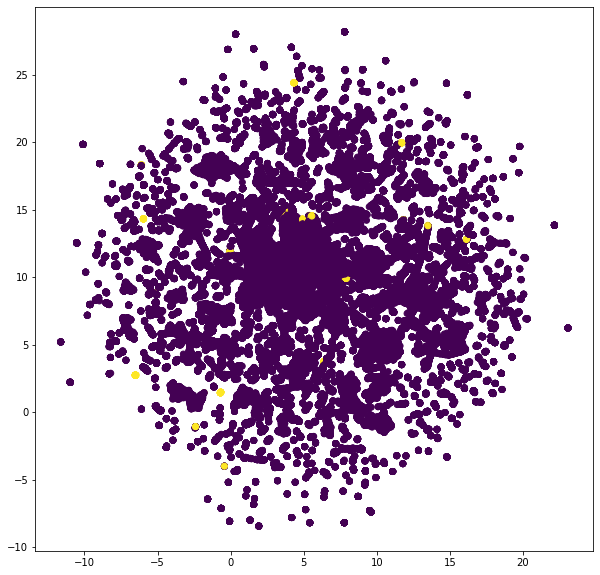

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(umap_data_transformed[:, 0], umap_data_transformed[:, 1], c=euclidian_outliers);

Most outliers presented do look like outliers

              precision    recall  f1-score   support

           1       0.04      0.04      0.04       492

   micro avg       0.04      0.04      0.04       492
   macro avg       0.04      0.04      0.04       492
weighted avg       0.04      0.04      0.04       492

confusion_matrix:
 [[283841    474]
 [   474     18]]
Euclidian distance model
Very bad score overall


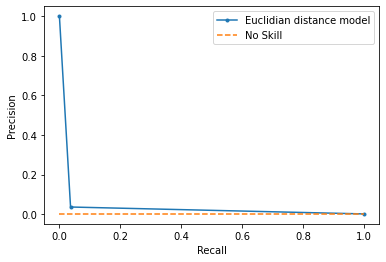

In [ ]:
print(classification_report(class_only, euclidian_outliers, labels=[1]))
print("confusion_matrix:\n",confusion_matrix(class_only, euclidian_outliers))

lr_precision, lr_recall, _ = precision_recall_curve(class_only, euclidian_outliers)

no_skill = len(class_only[class_only==1]) / len(class_only)

plt.plot(lr_recall, lr_precision, marker='.', label='Euclidian distance model')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
print("Euclidian distance model")
print("Very bad score overall")

In [ ]:
F1 = 2 * (lr_precision[1] * lr_recall[1]) / (lr_precision[1] + lr_recall[1])
Addi2 = [lr_precision[1],lr_recall[1], F1]
summary_0prec_1rec_2f1['Euclid dist']=Addi2

## Distance based model. 2. Citiblock_model

In [ ]:
citiblock_model = DistanceOutliers(metric='cityblock', percentile=expert_pc)
citiblock_model.fit(scaled_data)
cityblock_outliers = citiblock_model.predict(scaled_data)
anomalies_report(cityblock_outliers)

Total number of outliers: 492
Percentage of outliers:   0.17%


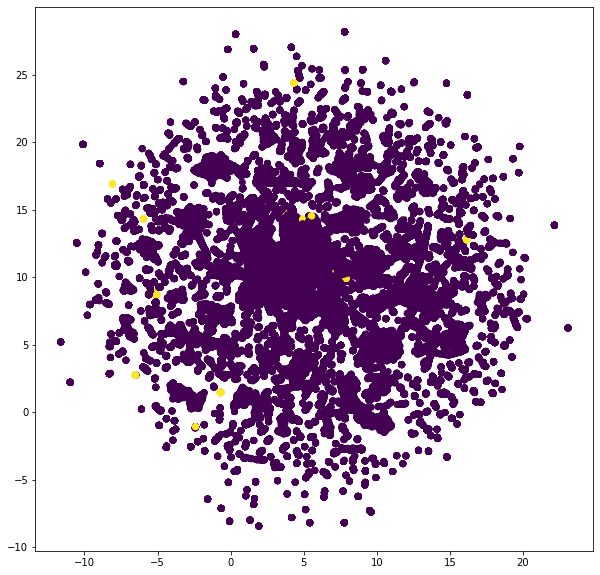

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(umap_data_transformed[:, 0], umap_data_transformed[:, 1], c=cityblock_outliers);

Most outliers presented do look like outliers here as well.

              precision    recall  f1-score   support

           1       0.23      0.23      0.23       492

   micro avg       0.23      0.23      0.23       492
   macro avg       0.23      0.23      0.23       492
weighted avg       0.23      0.23      0.23       492

confusion_matrix:
 [[283935    380]
 [   380    112]]
City block distance model
bad score, but it's not the worst


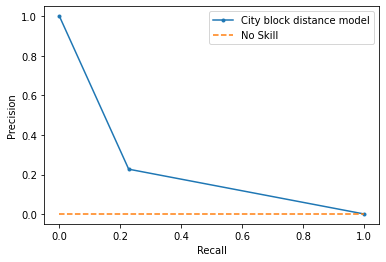

In [ ]:
print(classification_report(class_only, cityblock_outliers, labels=[1]))
print("confusion_matrix:\n",confusion_matrix(class_only, cityblock_outliers))

lr_precision, lr_recall, _ = precision_recall_curve(class_only, cityblock_outliers)

no_skill = len(class_only[class_only==1]) / len(class_only)

plt.plot(lr_recall, lr_precision, marker='.', label='City block distance model')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
print("City block distance model")
print("bad score, but it's not the worst")

In [ ]:
F1 = 2 * (lr_precision[1] * lr_recall[1]) / (lr_precision[1] + lr_recall[1])
Addi2 = [lr_precision[1],lr_recall[1], F1]
summary_0prec_1rec_2f1['City block dist']=Addi2

## Density-based - DBSCAN

My old macbook breaks down with DBSCAN solving even 15% of data.... so i'll use 10%

In [ ]:
from sklearn.model_selection import train_test_split
data_sample_small, data_bulk_big, class_sample_small, class_bulk_big = train_test_split(scaled_data, class_only, test_size=0.98, random_state=5)
data_sampleDBSC, data_bulkDBSC, class_sampleDBSC, class_bulkDBSC = train_test_split(scaled_data, class_only, test_size=0.90, random_state=5)
#data_sampleDBSC_showUmap, data_bulkDBSC_showUmap, class_sampleDBSC_showUmap, class_bulkDBSC_showUmap = train_test_split(umap_data_transformed, class_only, test_size=0.90, random_state=5)


In [ ]:
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist

Measure distances in the data to get the feeling of eps magrin


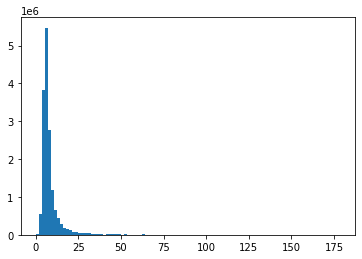

In [ ]:
plt.hist(pdist(data_sample_small),bins=100)
print("Measure distances in the data to get the feeling of eps magrin")

In [ ]:
from sklearn.cluster import DBSCAN
expert_pc=100.0 - 0.001727*100
outlier_percentage = 1.0

outlier_target=1.0 - expert_pc/100
print("outlier_target = ",outlier_target)

step_eps=0.1

# To accelerate, i'm using eps to start i've already found before 
eps = 22
while outlier_percentage > outlier_target:    
    model = DBSCAN(eps=eps).fit(data_sample_small)
    labels = model.labels_
    labels = np.array([1 if label == -1 else 0 for label in labels])
    outlier_percentage = sum(labels==1) / len(labels)    
    print("eps = ",eps," outlier_percentage = ",outlier_percentage)
    eps += step_eps
    
print("eps = ",eps)

model = DBSCAN(eps)
model.fit(data_sampleDBSC)
density_outlier = np.array([1 if label == -1 else 0 for label in model.labels_])

outlier_target =  0.001727000000000034
eps =  22  outlier_percentage =  0.0019311797752808988
eps =  22.1  outlier_percentage =  0.0017556179775280898
eps =  22.200000000000003  outlier_percentage =  0.0017556179775280898
eps =  22.300000000000004  outlier_percentage =  0.0017556179775280898
eps =  22.400000000000006  outlier_percentage =  0.0017556179775280898
eps =  22.500000000000007  outlier_percentage =  0.0017556179775280898
eps =  22.60000000000001  outlier_percentage =  0.0017556179775280898
eps =  22.70000000000001  outlier_percentage =  0.0017556179775280898
eps =  22.80000000000001  outlier_percentage =  0.0017556179775280898
eps =  22.900000000000013  outlier_percentage =  0.0015800561797752809
eps =  23.000000000000014


In [ ]:
anomalies_report(density_outlier)

Total number of outliers: 31
Percentage of outliers:   0.11%


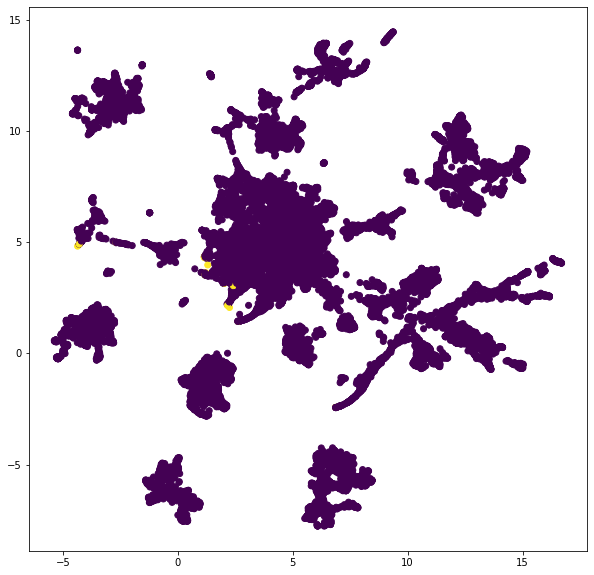

In [ ]:
reducer = umap.UMAP(n_components=2,random_state=42)
umap_data_sampleDBSC_transformed = reducer.fit_transform(data_sampleDBSC)

plt.figure(figsize=(10, 10))
plt.scatter(umap_data_sampleDBSC_transformed[:, 0], umap_data_sampleDBSC_transformed[:, 1], c=density_outlier);

Can't see the outliers so much as outliers here. With such a small number of outliers in the original data my method of calibrating the eps on smaller samples of data doesn't really work. The final number of outliers is 1.5 times lower than i needed.  

              precision    recall  f1-score   support

           1       0.03      0.02      0.02        50

   micro avg       0.03      0.02      0.02        50
   macro avg       0.03      0.02      0.02        50
weighted avg       0.03      0.02      0.02        50

confusion_matrix:
 [[28400    30]
 [   49     1]]
DBScan model
Very bad score


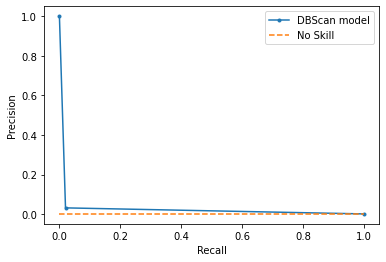

In [ ]:
print(classification_report(class_sampleDBSC, density_outlier, labels=[1]))
print("confusion_matrix:\n",confusion_matrix(class_sampleDBSC, density_outlier))

lr_precision, lr_recall, _ = precision_recall_curve(class_sampleDBSC, density_outlier)

no_skill = len(class_sampleDBSC[class_sampleDBSC==1]) / len(class_sampleDBSC)

plt.plot(lr_recall, lr_precision, marker='.', label='DBScan model')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

print("DBScan model")
print("Very bad score")

In [ ]:
F1 = 2 * (lr_precision[1] * lr_recall[1]) / (lr_precision[1] + lr_recall[1])
Addi2 = [lr_precision[1],lr_recall[1], F1]
summary_0prec_1rec_2f1['DBScan']=Addi2

## One-Class SVM

In [ ]:
from sklearn.svm import OneClassSVM

In [ ]:
expert_pc=100.0 - 0.001727*100

max_iter=50
num_iter=0
nu=0.01
min_nu=0.05
min_measure=1111111
while num_iter<max_iter:    
    num_iter=num_iter+1
    nu=(num_iter+1)*0.1/(max_iter+1)
    model = OneClassSVM(nu=nu).fit(data_sample_small)
    outlier_percentage = sum(labels==1) / len(labels)    
    svm_out = model.predict(data_sample_small)
    svm_out = np.array([1 if label == -1 else 0 for label in svm_out])
    unique, counts = np.unique(svm_out, return_counts=True)
    ss=dict(zip(unique, counts))
    #print(ss)
    
    allss=ss[1]+ss[0]
    if abs(1.0-ss[1]/allss/0.001727) <min_measure:
        min_measure=abs(1.0-ss[1]/allss/0.001727)
        min_nu=nu

print("nu = ",min_nu)

one_class_svm = OneClassSVM(nu=min_nu)
one_class_svm.fit(data_sampleDBSC)
svm_outliers = one_class_svm.predict(data_sampleDBSC)
svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])

nu =  0.01764705882352941


In [ ]:
anomalies_report(svm_outliers)

Total number of outliers: 533
Percentage of outliers:   1.87%


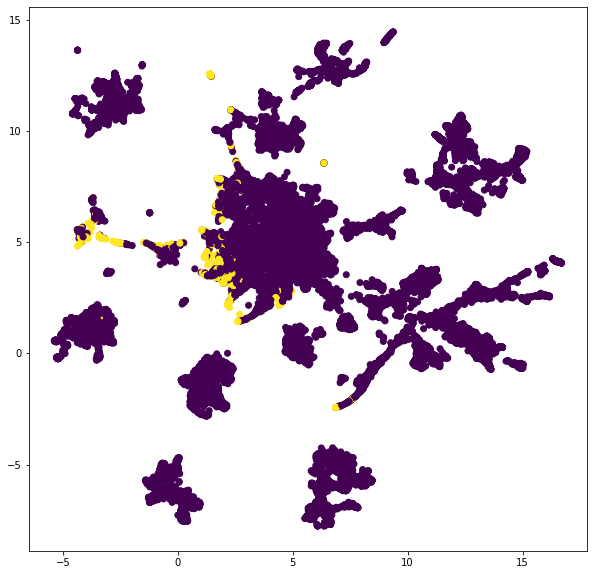

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(umap_data_sampleDBSC_transformed[:, 0], umap_data_sampleDBSC_transformed[:, 1], c=svm_outliers);

This method provides with the number of outliers >10 times more than i need. I tweaked "nu" parameter to find the lowest fraction of outliers i can find and its still more than 1%.  

              precision    recall  f1-score   support

           1       0.07      0.70      0.12        50

   micro avg       0.07      0.70      0.12        50
   macro avg       0.07      0.70      0.12        50
weighted avg       0.07      0.70      0.12        50

confusion_matrix:
 [[27932   498]
 [   15    35]]
Good recall score, bad precision, AUC is relatively good


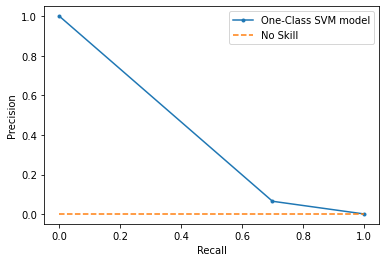

In [ ]:
print(classification_report(class_sampleDBSC, svm_outliers, labels=[1]))
print("confusion_matrix:\n",confusion_matrix(class_sampleDBSC, svm_outliers))

lr_precision, lr_recall, _ = precision_recall_curve(class_sampleDBSC, svm_outliers)

no_skill = len(class_sampleDBSC[class_sampleDBSC==1]) / len(class_sampleDBSC)

plt.plot(lr_recall, lr_precision, marker='.', label='One-Class SVM model')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
print("Good recall score, bad precision, AUC is relatively good")

In [ ]:
F1 = 2 * (lr_precision[1] * lr_recall[1]) / (lr_precision[1] + lr_recall[1])
Addi2 = [lr_precision[1],lr_recall[1], F1]
summary_0prec_1rec_2f1['OC_SVM']=Addi2

## Isolation Forest 

In [ ]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100, contamination=0.001727, max_features=1.0, bootstrap=True)
isolation_forest.fit(data_raw)

In [ ]:
isolation_outliers = isolation_forest.predict(data_raw)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

In [ ]:
anomalies_report(isolation_outliers)

Total number of outliers: 492
Percentage of outliers:   0.17%


Result are good, the outliers are relatively isolated.

              precision    recall  f1-score   support

           1       0.24      0.24      0.24       492

   micro avg       0.24      0.24      0.24       492
   macro avg       0.24      0.24      0.24       492
weighted avg       0.24      0.24      0.24       492

confusion_matrix:
 [[283943    372]
 [   372    120]]
Auc is relatively good


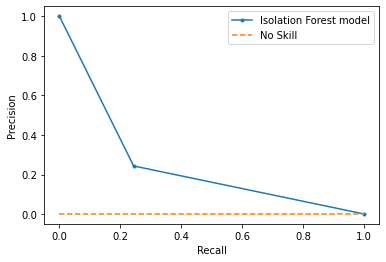

In [ ]:
print(classification_report(class_only, isolation_outliers, labels=[1]))
print("confusion_matrix:\n",confusion_matrix(class_only, isolation_outliers))

lr_precision, lr_recall, _ = precision_recall_curve(class_only, isolation_outliers)

no_skill = len(class_only[class_only==1]) / len(class_only)

plt.plot(lr_recall, lr_precision, marker='.', label='Isolation Forest model')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
print("Auc is relatively good")

In [ ]:
F1 = 2 * (lr_precision[1] * lr_recall[1]) / (lr_precision[1] + lr_recall[1])
Addi2 = [lr_precision[1],lr_recall[1], F1]
summary_0prec_1rec_2f1['Isolation Forest']=Addi2

#4 Summary

In [ ]:
df2_transposed = summary_0prec_1rec_2f1.T
df2 = df2_transposed.set_axis(['precision', 'recall', 'F1 score'], axis=1, inplace=False)
df2

,precision,recall,F1 score
3 sigma,0.011741,0.902439,0.023181
3 IQR,0.008475,0.918699,0.016794
Euclid dist,0.036585,0.036585,0.036585
City block dist,0.227642,0.227642,0.227642
DBScan,0.032258,0.020000,0.024691
OC_SVM,0.065666,0.700000,0.120069
Isolation Forest,0.243902,0.243902,0.243902


If we care about the precision, the best methods are 
City block, Isolation Forest and OC_SVM.

If we care about the recall, the best methods are 
3 sigma, 3 IQR and OC_SVM..

It seems like OC_SVM is the best one.

#5 The combined model shows relatively good results

My strategy:
1. Train Isolation Forest with 4 times higher "contamination" to get better recall
2. Do the same with City block model
3. Combine them with OC_SVM

In [ ]:
from sklearn.ensemble import IsolationForest
contamination4times=0.001727*4
isolation_forest = IsolationForest(n_estimators=100, contamination=contamination4times, max_features=1.0, bootstrap=True)
isolation_forest.fit(data_sampleDBSC)
isolation_outliers2 = isolation_forest.predict(data_sampleDBSC)
isolation_outliers2 = np.array([1 if label == -1 else 0 for label in isolation_outliers2])

expert_pc4times=100-4*(100-expert_pc)
citiblock_model = DistanceOutliers(metric='cityblock', percentile=expert_pc4times)
citiblock_model.fit(data_sampleDBSC)
cityblock_outliers2 = citiblock_model.predict(data_sampleDBSC)


In [ ]:
summ_outlier=svm_outliers+cityblock_outliers2+isolation_outliers2
unique, counts = np.unique(summ_outlier, return_counts=True)
ss=dict(zip(unique, counts))
print(ss)
print("Simple addition of these models gives us 139 points which are predicted by all three of them")

{0: 27913, 1: 346, 2: 82, 3: 139}
Simple addition of these models gives us 139 points which are predicted by all three of them


In [ ]:
combined_outlier = np.array([1 if label >1  else 0 for label in summ_outlier])

Combined model results
              precision    recall  f1-score   support

           1       0.14      0.62      0.23        50

   micro avg       0.14      0.62      0.23        50
   macro avg       0.14      0.62      0.23        50
weighted avg       0.14      0.62      0.23        50

confusion_matrix:
 [[28240   190]
 [   19    31]]
Auc is relatively good


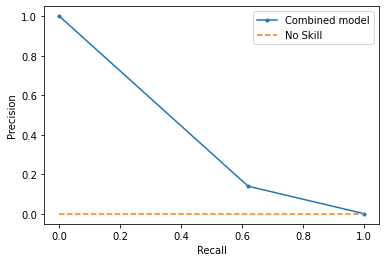

In [ ]:
print("Combined model results")
print(classification_report(class_sampleDBSC, combined_outlier, labels=[1]))
print("confusion_matrix:\n",confusion_matrix(class_sampleDBSC, combined_outlier))

lr_precision, lr_recall, _ = precision_recall_curve(class_sampleDBSC, combined_outlier)

no_skill = len(class_sampleDBSC[class_sampleDBSC==1]) / len(class_only)

plt.plot(lr_recall, lr_precision, marker='.', label='Combined model')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

print("The precision is 3d best, recall is 1st within models")
print("i couldn't push for the best f1 score thou")
print("Auc is relatively good")

In [ ]:
combinedDF = pd.DataFrame(umap_data_sampleDBSC_transformed, columns = ['x', 'y'])
combinedDF['class']=combined_outlier
sampledTrueDF = pd.DataFrame(umap_data_sampleDBSC_transformed, columns = ['x', 'y'])
sampledTrueDF['class']=class_sampleDBSC.values

		Combined model prediction 				 Original Data


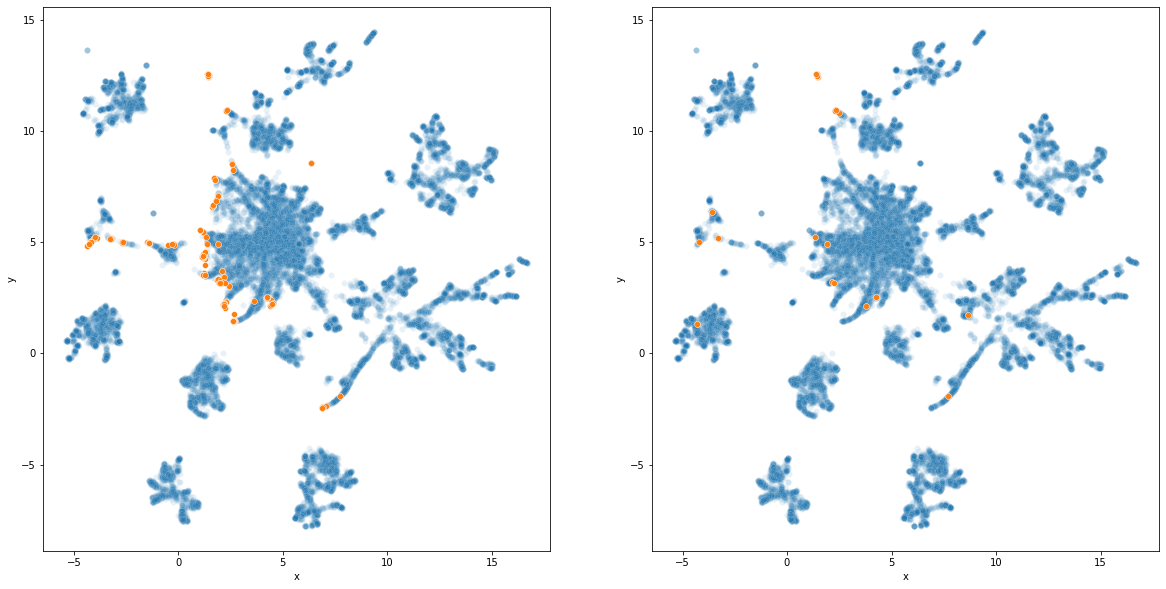

In [ ]:
print('\t\tCombined model prediction','\t\t\t\t','Original Data')

fig, axs = plt.subplots(ncols=2,figsize=(20,10))

sns.scatterplot(x="x", y="y", data=combinedDF[combinedDF['class']== 0 ], alpha=0.1, ax=axs[0])
sns.scatterplot(x="x", y="y", data=combinedDF[combinedDF['class'] == 1], alpha=1.0, ax=axs[0])

sns.scatterplot(x="x", y="y", data=sampledTrueDF[sampledTrueDF['class']== 0 ], alpha=0.1, ax=axs[1])
sns.scatterplot(x="x", y="y", data=sampledTrueDF[sampledTrueDF['class'] == 1], alpha=1.0, ax=axs[1])
plt.show()


#It wouldn't be difficult to multiply results of different models by some parameters and run macro to find best values for these new parameters if i'll need to optimize f1, recall or precision or some other metric.